In [1]:
import torch
import numpy as np

In [2]:
import DeformationModules as defmod
import Shooting as shoot
import Hamiltonian as ham

In [3]:
N = 10
d=2

In [4]:
sigma0 = 1
nb_pts0 = 2
sigma1 = 1
nb_pts1 = 1

Trans0 = defmod.TranslationsIdenticalCost(sigma0, d, nb_pts0)
Trans1 = defmod.TranslationsIdenticalCost(sigma1, d, nb_pts1)


In [5]:
Mod = defmod.Compound([Trans0, Trans1])

In [6]:
hamilt = ham.Hamilt(Mod)

In [7]:
def H_r(GD, MOM):
    return hamilt(GD, MOM, hamilt.Cont_geo(GD, MOM))

In [8]:
GD_Trans0 = torch.tensor([[-1., 0.], [1., 0.]], dtype=torch.float32, requires_grad=True).view(-1)
MOM_Trans0 = torch.tensor([[1., 1.], [0., 1.]], dtype=torch.float32, requires_grad=True).view(-1)

GD_Trans1 = torch.tensor([[0., 0.]], dtype=torch.float32, requires_grad=True).view(-1)
MOM_Trans1 = torch.tensor([[0., -1.]], dtype=torch.float32, requires_grad=True).view(-1)

In [9]:
GD = torch.cat([GD_Trans0, GD_Trans1])
MOM = torch.cat([MOM_Trans0, MOM_Trans1])

In [10]:
hamilt.Cont_geo(GD, MOM)

tensor([ 1.0000,  0.6504,  0.0183,  0.6504,  0.3679, -0.2642],
       grad_fn=<CatBackward>)

In [11]:
GD_final = shoot.shoot(Mod, GD, MOM, H_r, N)

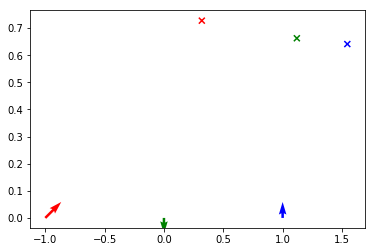

In [14]:
import Visualisation as vis


vis.plot_momentum(GD, MOM, GD_final)

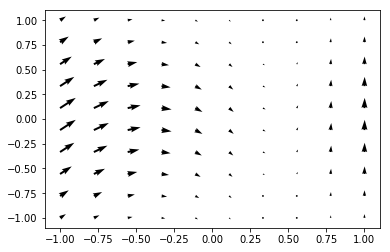

In [13]:
vis.plot_vectorfield(Mod, GD, MOM)